In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


# Load The Data

In [2]:
housing = pd.read_csv('../input/housing-prices-dataset/Housing.csv')

# Take a Quick Look at the Data Structure


In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Information About Data


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Values Of Our Categorical Variable

In [5]:
housing["mainroad"].value_counts()
# housing["guestroom"].value_counts()
# housing["basement"].value_counts()
# housing["hotwaterheating"].value_counts()
# housing["airconditioning"].value_counts()
# housing["prefarea"].value_counts()
# housing["furnishingstatus"].value_counts()



yes    468
no      77
Name: mainroad, dtype: int64

# Summary Of Integer Variables


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#  Histogram Plot For Integer Variables

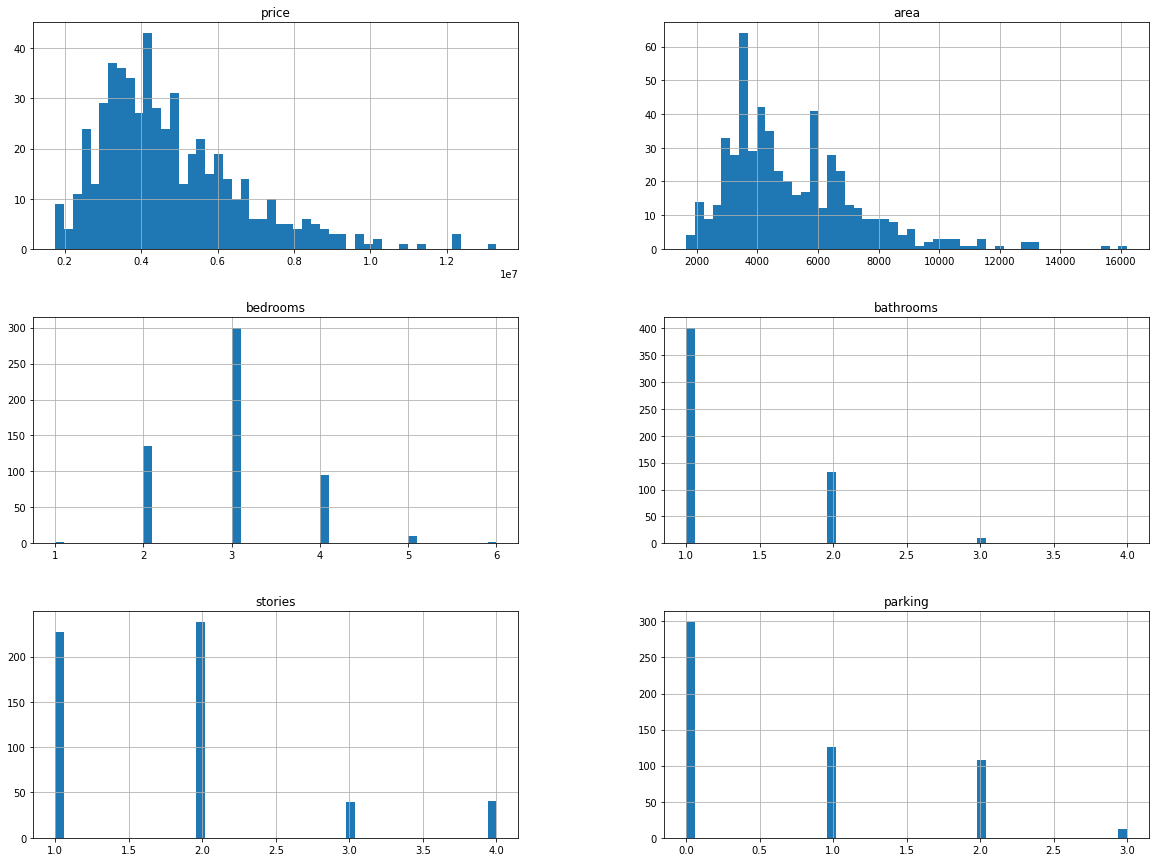

In [7]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

# Create a Test Set


In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


<AxesSubplot:>

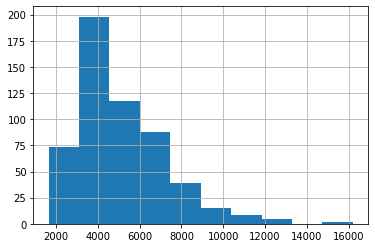

In [9]:
housing["area"].hist()

In [10]:
housing["area_cat"] = pd.cut(housing["area"],
                               bins=[0., 2000, 4000, 6000, 8000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
housing["area_cat"].value_counts()


2    200
3    181
4    104
5     53
1      7
Name: area_cat, dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["area_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing["area_cat"].value_counts() / len(housing)


2    0.366972
3    0.332110
4    0.190826
5    0.097248
1    0.012844
Name: area_cat, dtype: float64

In [14]:
strat_test_set["area_cat"].value_counts() / len(strat_test_set)


2    0.366972
3    0.330275
4    0.192661
5    0.100917
1    0.009174
Name: area_cat, dtype: float64

# Discover and Visualize the Data to Gain Insights and Looking for Correlations

 

In [15]:
housing = strat_train_set.copy()


In [16]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)


price        1.000000
bathrooms    0.555899
area         0.518666
stories      0.422540
parking      0.407808
bedrooms     0.375640
Name: price, dtype: float64

<AxesSubplot:xlabel='area', ylabel='price'>

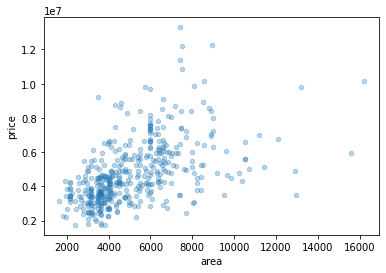

In [17]:
housing.plot(kind="scatter", x="area", y="price", alpha=0.3)


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

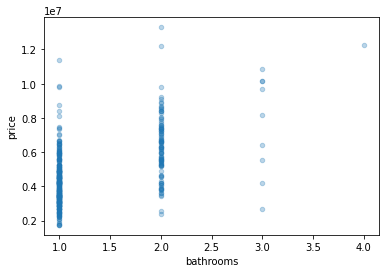

In [18]:
housing.plot(kind="scatter", x="bathrooms", y="price", alpha=0.3)


In [19]:
housing["lux_home"] = housing["bathrooms"] + housing["bedrooms"] + housing["parking"]
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
lux_home     0.619887
bathrooms    0.555899
area         0.518666
stories      0.422540
parking      0.407808
bedrooms     0.375640
Name: price, dtype: float64

# Prepare the Data for Machine Learning Algorithms


In [20]:
housing = strat_train_set.drop("price", axis=1) # drop labels for training set
housing_labels = strat_train_set["price"].copy()

# Data Cleaning


In [21]:
housing.isnull().values.any()


False

In [22]:
housing.isnull().sum()


area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
area_cat            0
dtype: int64

# Handling Text and Categorical Attributes


In [23]:
housing_cat = pd.concat([housing['mainroad'],housing['guestroom'],housing['basement'],housing['hotwaterheating'],housing['airconditioning'],housing['prefarea'],housing['furnishingstatus']], 
                        axis = 1, 
                        keys = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
housing_cat.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
524,yes,no,no,no,no,no,unfurnished
107,yes,no,yes,no,no,yes,unfurnished
260,yes,no,no,no,yes,no,furnished
189,no,yes,yes,no,no,no,semi-furnished
493,yes,no,no,no,no,no,furnished


In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<436x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3052 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [26]:
cat_encoder.categories_

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

# Create Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

housing_num = housing.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="median")
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [29]:
housing_prepared

array([[-0.86913423, -1.29090909, -0.55930807, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58835656,  0.03030303, -0.55930807, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91623945,  0.03030303, -0.55930807, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.05818562,  0.03030303, -0.55930807, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08589457,  1.35151515, -0.55930807, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0489493 ,  0.03030303, -0.55930807, ...,  0.        ,
         0.        ,  1.        ]])

In [30]:
housing_prepared.shape

(436, 20)

# Select and Train a Model

# Training and Evaluating on the Training Set


In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [32]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2533638.36926913 5093266.20965077 4680940.90844747 3201247.34970405
 3247674.36473871]


In [33]:
print("Labels:", list(some_labels))

Labels: [2380000, 6125000, 4473000, 5040000, 2800000]


In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1013490.2618800116

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [36]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

62300.39686503838

# Better Evaluation Using Cross-Validation


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1304044.44509101 1671143.26491627 1505900.29123022 1273574.88536653
 1777353.65399338 1278591.54626647 2108232.53566076 1530073.85062686
 1750127.26595379 1366352.1220584 ]
Mean: 1556539.3861163692
Standard deviation: 257730.11696790936


In [39]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 956880.9049023  1117413.88666606  759316.20601656  820605.42111931
 1230072.8001002  1107622.15582057 1229258.52762657 1177809.48501142
 1131385.61409644  870463.06577155]
Mean: 1040082.8067130981
Standard deviation: 165052.64946733514


# Linear regression looks better. Let's try Random Forest.

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [41]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

430864.36440339923

In [42]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 958783.73074222 1293192.56722683  932240.69574044  996735.00321291
 1113418.07101968 1072845.0941803  1298909.97866807 1278457.50249992
 1286910.29020632 1041046.40020271]
Mean: 1127253.9333699401
Standard deviation: 141203.80819468494


# Since our dataset is quite small, I am having a hard time choosing a model.

# Fine-Tune Your Model
# Grid Search


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [45]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

# Analyze the Best Models and Their Errors


In [46]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.31770718, 0.06012796, 0.16375215, 0.06767579, 0.08001343,
       0.01023433, 0.00892747, 0.02082839, 0.0142814 , 0.0160711 ,
       0.01586083, 0.00806864, 0.01418724, 0.05391782, 0.04827353,
       0.02583841, 0.01739976, 0.01538143, 0.01330194, 0.02815119])

In [47]:
extra_attribs = ["lux_home","area_cat"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31770717726884373, 'area'),
 (0.16375215029840018, 'bathrooms'),
 (0.08001343489791896, 'parking'),
 (0.06767578599251829, 'stories'),
 (0.06012796147555445, 'bedrooms'),
 (0.053917822858296896, 'area_cat'),
 (0.020828389726438152, array(['no', 'yes'], dtype=object)),
 (0.016071102144753286, array(['no', 'yes'], dtype=object)),
 (0.01586083420973123, array(['no', 'yes'], dtype=object)),
 (0.014281396723834187, array(['no', 'yes'], dtype=object)),
 (0.014187241907104442, 'lux_home'),
 (0.010234331304528086, array(['no', 'yes'], dtype=object)),
 (0.008927472498301978, array(['no', 'yes'], dtype=object)),
 (0.008068642624007118,
  array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object))]

# Evaluate Your System on the Test Set


In [48]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [49]:
final_rmse


1217359.2804330105

# We can compute a 95% confidence interval for the test RMSE:


In [50]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))



array([ 879357.6628748, 1480086.9353035])

In [51]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(883861.1555981532, 1477402.0078967845)

# Here are the basic steps of end-to-end machine learning. We could not create the desired model due to insufficient data set. :(

# THANK YOU